In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

## 데이터 불러오기

In [16]:
train = pd.read_csv("C:/Users/ASUS/Documents/kaggle data/titanic/train.csv")
test = pd.read_csv("C:/Users/ASUS/Documents/kaggle data/titanic/test.csv")

## Data Cleaning

In [17]:
#변수 이름 확인
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [18]:
#범주형 변수인지 연속형 변수인지 확인하려면 데이터를 직업 눈으로 보는것이 좋음
train.head(10)

#범주형 변수 : Survived, Pclass(ordinal), Sex, Embaarked
#연속형 변수 : Sibp, Parch, Age, Fare, 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
#필요없는 변수 drop
drop_columns = ['PassengerId','Ticket', 'Cabin']
train.drop(drop_columns, axis = 1, inplace = True)
test.drop(drop_columns, axis = 1, inplace = True)
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [7]:
train['SibSp'].value_counts() #연속형

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [8]:
train['Parch'].value_counts() # 연속형

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [9]:
#변수들의 기초통계량 확인
continuous = ['Age', 'SibSp', 'Parch','Fare']
cont_df = train[continuous]
cont_df.describe(include = 'all')

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [10]:
cate = ['Survived', 'Pclass', 'Sex', 'Embarked']
cate_df = train[cate]
cate_df.describe(include='all')

,Survived,Pclass,Sex,Embarked
count,891.000000,891.000000,891,889
unique,NaN,NaN,2,3
top,NaN,NaN,male,S
freq,NaN,NaN,577,644
mean,0.383838,2.308642,NaN,NaN
std,0.486592,0.836071,NaN,NaN
min,0.000000,1.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN
50%,0.000000,3.000000,NaN,NaN
75%,1.000000,3.000000,NaN,NaN


In [20]:
# missing value 확인
print('train data : ',train.isnull().sum())
print('test data : ', test.isnull().sum())

train data :  Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
test data :  Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [23]:
#mising value imputation
train['Age'].fillna(train['Age'].median(), inplace = True)
test['Age'].fillna(test['Age'].median(), inplace = True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
test['Fare'].fillna(test['Fare'].median(), inplace = True)
print('train data : ',train.isnull().sum())
print('test data : ', test.isnull().sum())

train data :  Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
test data :  Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


# Data formats transform

In [29]:
label = LabelEncoder()
train['sex_code'] = label.fit_transform(train['Sex'])
test['sex_code'] = label.fit_transform(test['Sex'])

train['embarked_code'] = label.fit_transform(train['Embarked'])
test['embarked_code'] = label.fit_transform(test['Embarked'])

# EDA

In [83]:
target = train['Survived']

x = ['Pclass', 'sex_code', 'Age', 'SibSp', 'Parch', 'Fare', 'embarked_code']
train_x = train[x]
test_x = test[x]

Text(0, 0.5, 'SisSp')

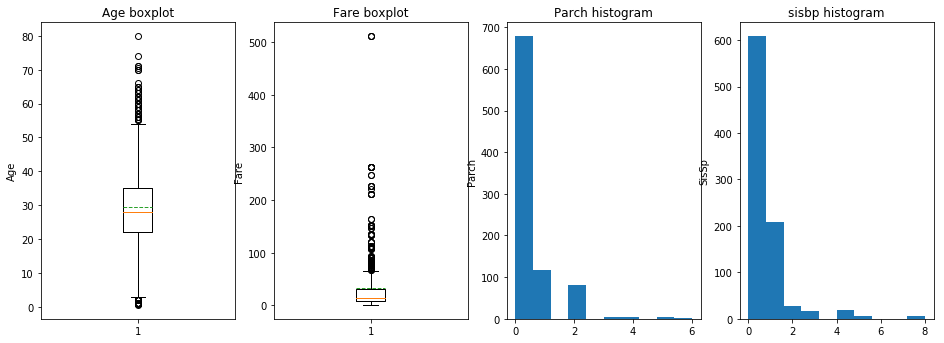

In [44]:
#연속형 변수 boxplot, histogram
plt.figure(figsize = [16,12])

plt.subplot(241)
plt.boxplot(train_x['Age'], meanline = True, showmeans = True)
plt.title('Age boxplot')
plt.ylabel('Age')

plt.subplot(242)
plt.boxplot(train_x['Fare'], meanline = True, showmeans = True)
plt.title('Fare boxplot')
plt.ylabel('Fare')

plt.subplot(243)
plt.hist(train['Parch'])
plt.title('Parch histogram')
plt.ylabel('Parch')

plt.subplot(244)
plt.hist(train['SibSp'])
plt.title('sisbp histogram')
plt.ylabel('SisSp')

Text(0.5, 1.0, 'Sex')

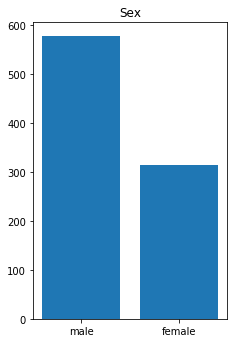

In [64]:
plt.figure(figsize = [16,12])

plt.subplot(241)
sex = [train['Sex'].value_counts().index[0], train['Sex'].value_counts().index[1]]
value = [train['Sex'].value_counts()[0],train['Sex'].value_counts()[1]]
plt.bar(sex, value)
plt.title('Sex')

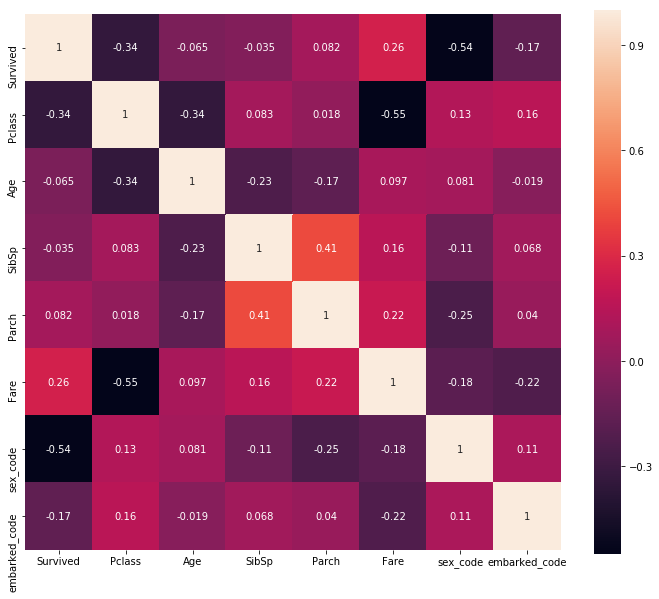

In [73]:
plt.subplots(figsize = (12,10))
sns.heatmap(train.corr(), square = True, annot = True)

In [91]:
#train valid split
train_x, valid_x, train_y, valid_y = train_test_split(train_x, target)

In [104]:
#logistic regression
logistic = LogisticRegression()
logistic.fit(train_x, train_y)

scores = cross_val_score(logistic, train_x, train_y, cv=5)
print(scores.mean())

val_pred = logistic.predict(valid_x)
accuracy = accuracy_score(val_pred, valid_y)
print(accuracy)

0.7962912709181366
0.820627802690583


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [119]:
#adabosst
ada = ensemble.AdaBoostClassifier()
ada.fit(train_x, train_y)

scores = cross_val_score(ada, train_x, train_y, cv = 5)
print(scores.mean())

val_pred = ada.predict(valid_x)
accuracy = accuracy_score(val_pred, valid_y)
print(accuracy)

0.7917684305744007
0.8161434977578476


In [120]:
#randomforest
rfc = ensemble.RandomForestClassifier()
rfc.fit(train_x, train_y)

scores = cross_val_score(rfc, train_x, train_y)
print(scores.mean())

val_pred = rfc.predict(valid_x)
accuracy = accuracy_score(val_pred, valid_y)
print(accuracy)

0.808393595389111
0.8340807174887892


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [108]:
#test
pred_y = logistic.predict(test_x)
submit_df = pd.DataFrame({'Predict' : pred_y})
submit_df.to_csv('C:/Users/ASUS/Documents/kaggle data/titanic/submit.csv', index = False)

In [125]:
#regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [126]:
LinearRegression = ensemble.AdaBoostClassifier()
LinearRegression.fit(train_x, train_y)

scores = cross_val_score(LinearRegression, train_x, train_y, cv = 5)
print(scores.mean())

val_pred = LinearRegression.predict(valid_x)
accuracy = mean_squared_error(val_pred, valid_y)
print(accuracy)

0.7917684305744007
0.18385650224215247
